## S11, S21 and S22 for TL-ANT2409A measurements on broadside

#### Setup

In [1]:
import skrf as rf
%matplotlib inline
from matplotlib import pyplot as plt  # for advanced smith chart only
import skrf as rf
import numpy as np

filenames = []
networks = []

In [2]:
networks.append(rf.Network("Lab_5/0-360/0d.S2P"))

for i in range(36):
    # we're looking at txt files first
    filename = 'Lab_5/0-360/' + f"{(i+1)*10}.S2P"

    networks.append(rf.Network(filename))

Text(0.5, 1.0, 'Smith Chart, 160º')

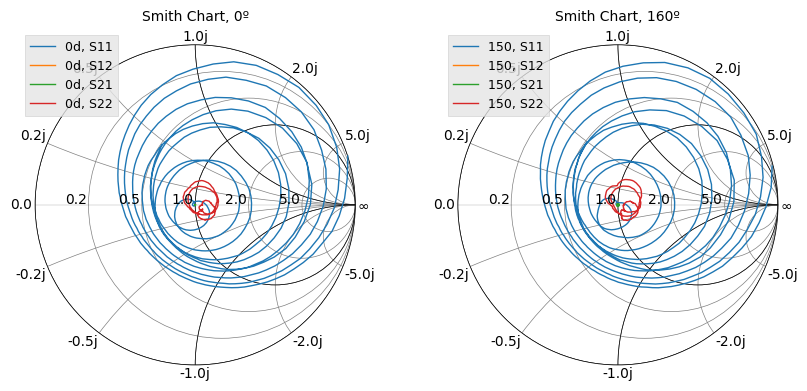

In [3]:
## plot s11
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rf.stylely()
networks[0].plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks[15].plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
axs[0].set_title("Smith Chart, 0º", fontsize=10)
axs[1].set_title("Smith Chart, 160º", fontsize=10)

Text(0.5, 1.0, 'Smith Chart, 160º')

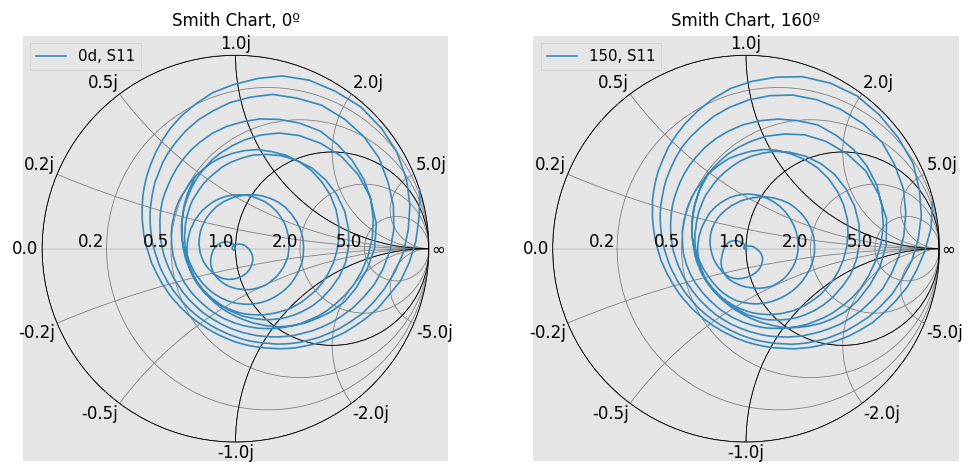

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rf.stylely()
networks[0].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks[15].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
axs[0].set_title("Smith Chart, 0º", fontsize=10)
axs[1].set_title("Smith Chart, 160º", fontsize=10)

Text(0.5, 1.0, 'Smith Chart, 160º')

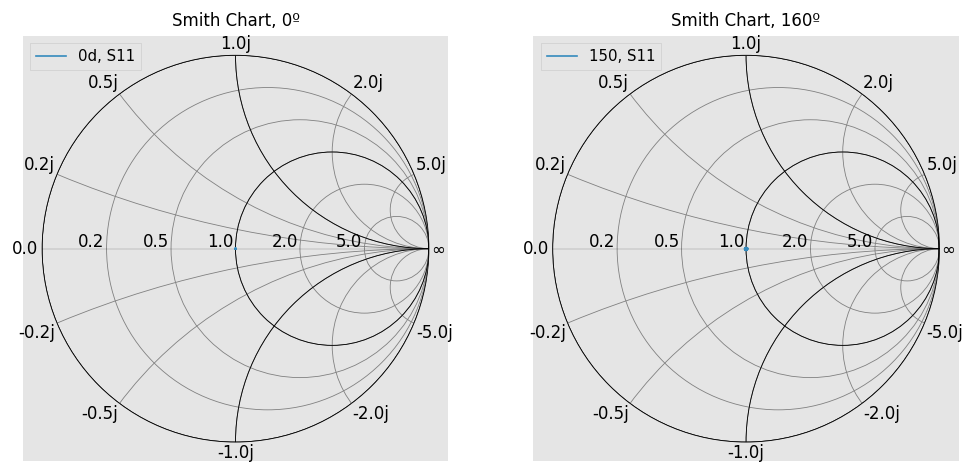

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rf.stylely()
networks[0].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks[15].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
axs[0].set_title("Smith Chart, 0º", fontsize=10)
axs[1].set_title("Smith Chart, 160º", fontsize=10)

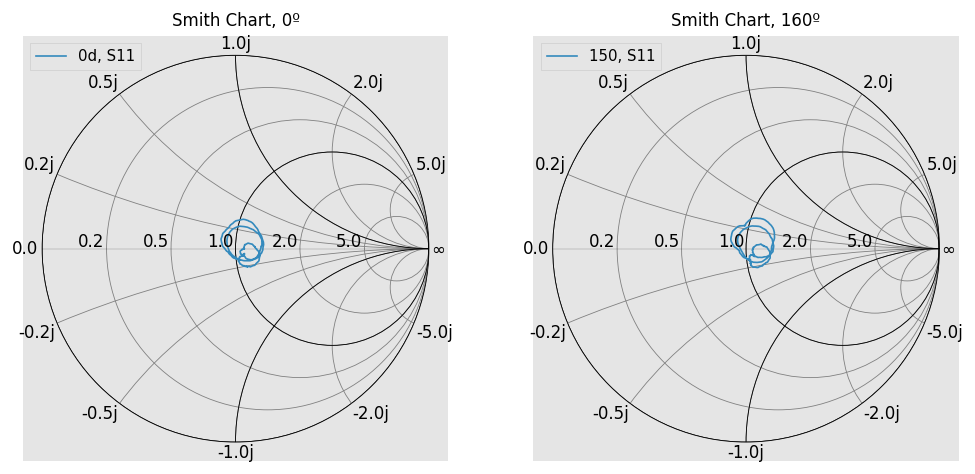

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rf.stylely()
networks[0].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
axs[0].set_title("Smith Chart, 0º", fontsize=10)
axs[1].set_title("Smith Chart, 160º", fontsize=10)
networks[15].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])

Text(0.5, 1.0, 'All S Parameter Measurements for Unknown Antenna, 150º')

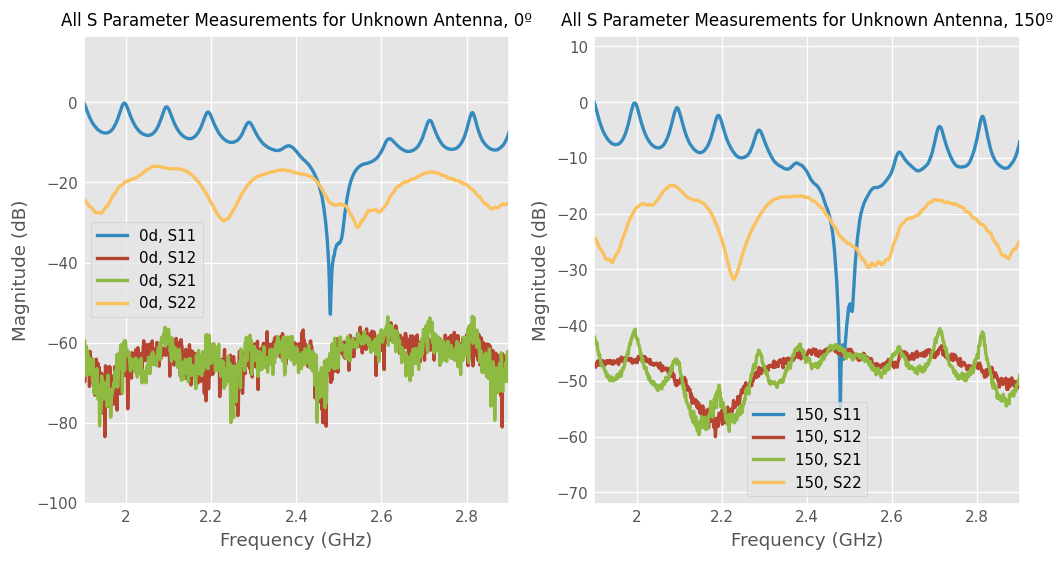

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rf.stylely()
networks[0].plot_s_db(lw=2, ax=axs[0])
axs[0].set_title("All S Parameter Measurements for Unknown Antenna, 0º", fontsize=10)
networks[15].plot_s_db(lw=2, ax=axs[1])
axs[1].set_title("All S Parameter Measurements for Unknown Antenna, 150º", fontsize=10)

In [44]:
networks[0]["2400mHz"].s21.s_db

array([[[-61.10657392]]])

Text(0.5, 1.0, 'S Parameters, Unknown Antenna, Spanning 2.45-2.5 GHz, 0º')

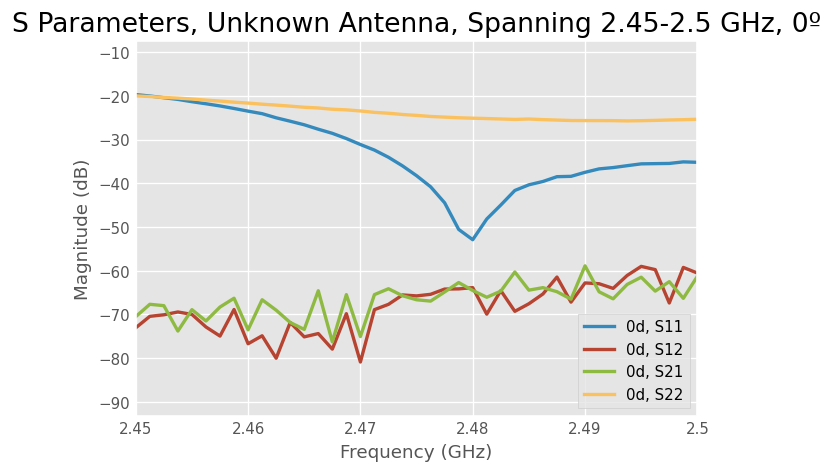

In [45]:
networks[0]['2.45-2.5ghz'].plot_s_db(lw=2)
plt.title("S Parameters, Unknown Antenna, Spanning 2.45-2.5 GHz, 0º")

## Calculations showing gain extraction from TL-ANT2409A

#### Calculate the Gain of Antenna

In [9]:
## Gather all of the S21 data together

s21_data_q1 = []

for i in range(len(networks)):
    s21_v = networks[i]['2.48ghz'].s21.s_db[0][0][0]
    s21_data_q1.append(s21_v)


In [46]:
## Gain of Horn Antenna (G_TX) at 2.4 GHz
g_tx = 13.03 # dBm
l_val = 3e8/(2.48e9) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

In [47]:
g_rx_list_q1 = []

for s21 in s21_data_q1:
    val = s21 - g_tx - air_loss
    g_rx_list_q1.append(val)

## Radiation pattern for TL-ANT2409A

## Discussion of antenna type for TL-ANT2409A

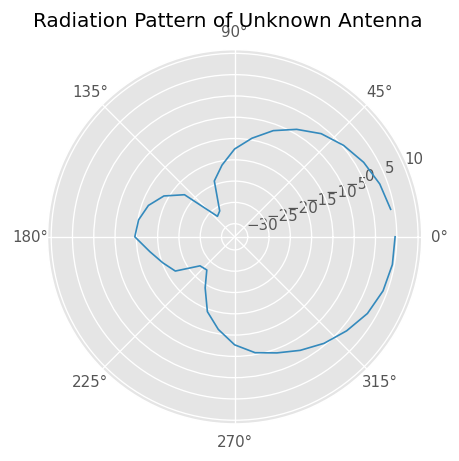

In [49]:
angles = np.linspace(0, 360, 37)
angles = angles * 2 * np.pi / 360.0

# plot
ax = plt.subplot(111, polar=True)
plt.suptitle("Radiation Pattern of Unknown Antenna")
# set zero west
# let set an azimuth for example, pi
plt.plot(angles[1:], g_rx_list_q1[1:])

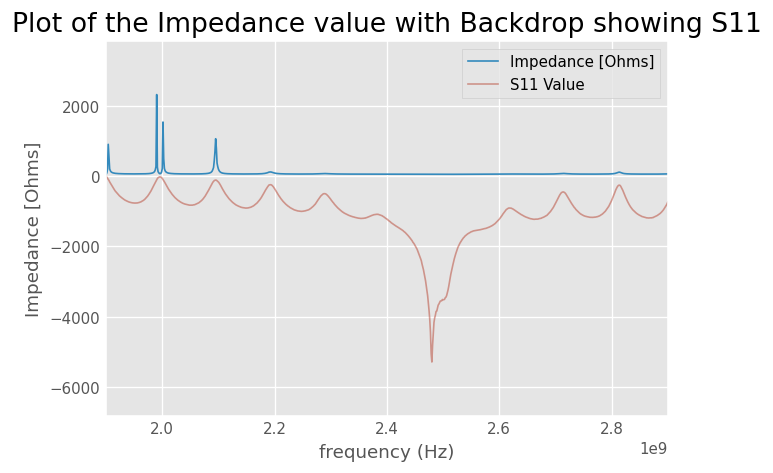

In [107]:
# plot the impedance vs frequency - need to use s11

s11_val = networks[0].s11.s_db

s11_val = np.expand_dims(s11_val, [1,2] )
s11_val = s11_val[:,0,0,0,0]
z_impedance_map = [ np.abs(50*(1-i)/(i + 1)) for i in s11_val]
plt.plot(networks[0].f, z_impedance_map, label="Impedance [Ohms]")
plt.plot(networks[0].f, s11_val*100, label="S11 Value", alpha=0.5)
plt.title("Plot of the Impedance value with Backdrop showing S11")
plt.xlabel("frequency (Hz)")
plt.ylabel("Impedance [Ohms]")
plt.legend()

## Discussion of patch antenna theory for machined antenna

In [13]:
filenames_patch = []
networks_patch = []

angles_patch = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

for i in angles_patch:
    # we're looking at txt files first
    filenames_patch = 'Lab_5/patch-0-360/' + f"{i}.S1P"

    networks_patch.append(rf.Network(filenames_patch))

# networks_patch[0].plot_s_db(lw=2)

In [14]:
## Gather all of the S21 data together

s21_data_q2_1 = []

for i in range(len(networks_patch)):
    s21_v = networks_patch[i]['1.4Ghz'].s_db[0][0][0]
    s21_data_q2_1.append(s21_v)

In [15]:
## Gain of Horn Antenna (G_TX) at 2.4 GHz
g_tx = 4.55 # dBm
l_val = 3e8/(1.4e9) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

In [16]:
g_rx_list_q2_1 = []

for s21 in s21_data_q2_1:
    # print(s21)
    val = s21 - g_tx - air_loss
    g_rx_list_q2_1.append(val)

# print(g_rx_list_q2)

## Extracted radiation pattern of patch antenna

Text(0.5, 1.0, 'Patch Antenna, Double Resonant Frequency')

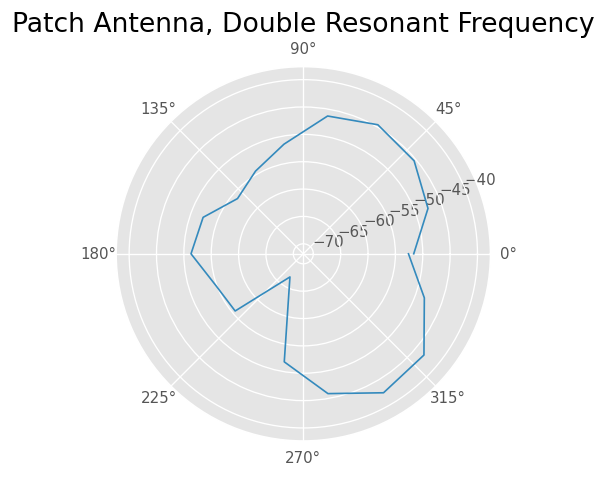

In [17]:
# plot
ax = plt.subplot(111, polar=True)
# set zero west
# let set an azimuth for example, pi
angles_patch = [p * 2 * np.pi / 360 for p in angles_patch]

plt.plot(angles_patch, g_rx_list_q2_1)
plt.title("Patch Antenna, Double Resonant Frequency")

#### A little over resonant frequency

-9.445195174000219


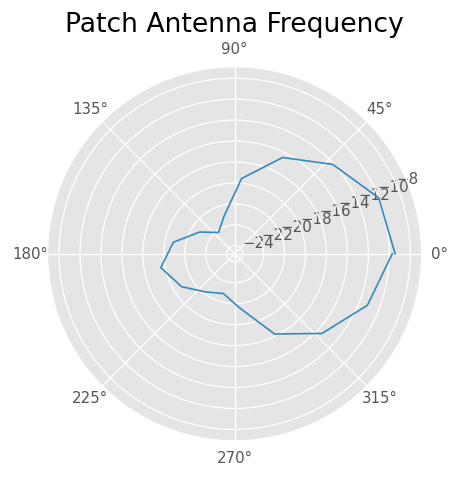

In [18]:
filenames_2 = []
networks_2 = []

s21_data_q2_2 = []

num_points=18
for i in range(num_points):
    # we're looking at txt files first
    filenames_2 = 'Lab_5/patch-0-360-better/' + f"{i*20}.S2P"
    networks_2.append(rf.Network(filenames_2))

for i in range(len(networks_2)):
    s21_v = networks_2[i]['728.155Mhz'].s21.s_db[0][0][0]
    s21_data_q2_2.append(s21_v)
    
g_tx = 4.55 # dBm
l_val = 3e8/(728.155e6) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

g_rx_list_q2_2 = []

for s21 in s21_data_q2_2:
    val = s21 - g_tx - air_loss
    g_rx_list_q2_2.append(val)

# plot
ax = plt.subplot(111, polar=True)

# set zero west
# let set an azimuth for example, pi
angles_2 = np.linspace(0, 360, num_points)
angles_2 = angles_2 * 2 * np.pi / 360
plt.plot(angles_2, g_rx_list_q2_2)
plt.title("Patch Antenna Frequency")

print(max(g_rx_list_q2_2))

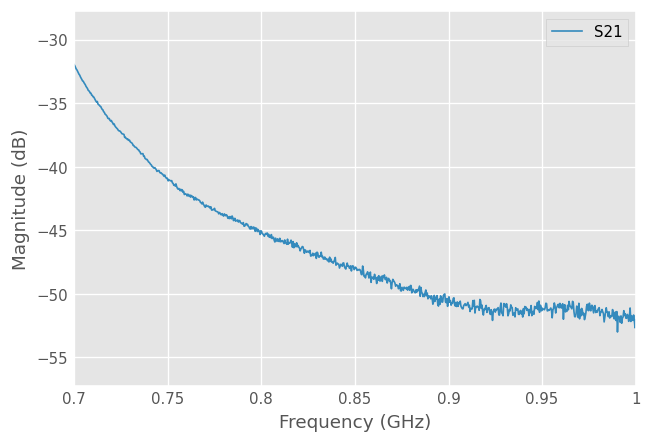

In [19]:
networks_2[0].s21.plot_s_db(label="S21")

## S11, S21 and S22 for patch antenna measurements on broadside

Text(0.5, 1.0, 'Smith Chart, Patch Antenna 160º')

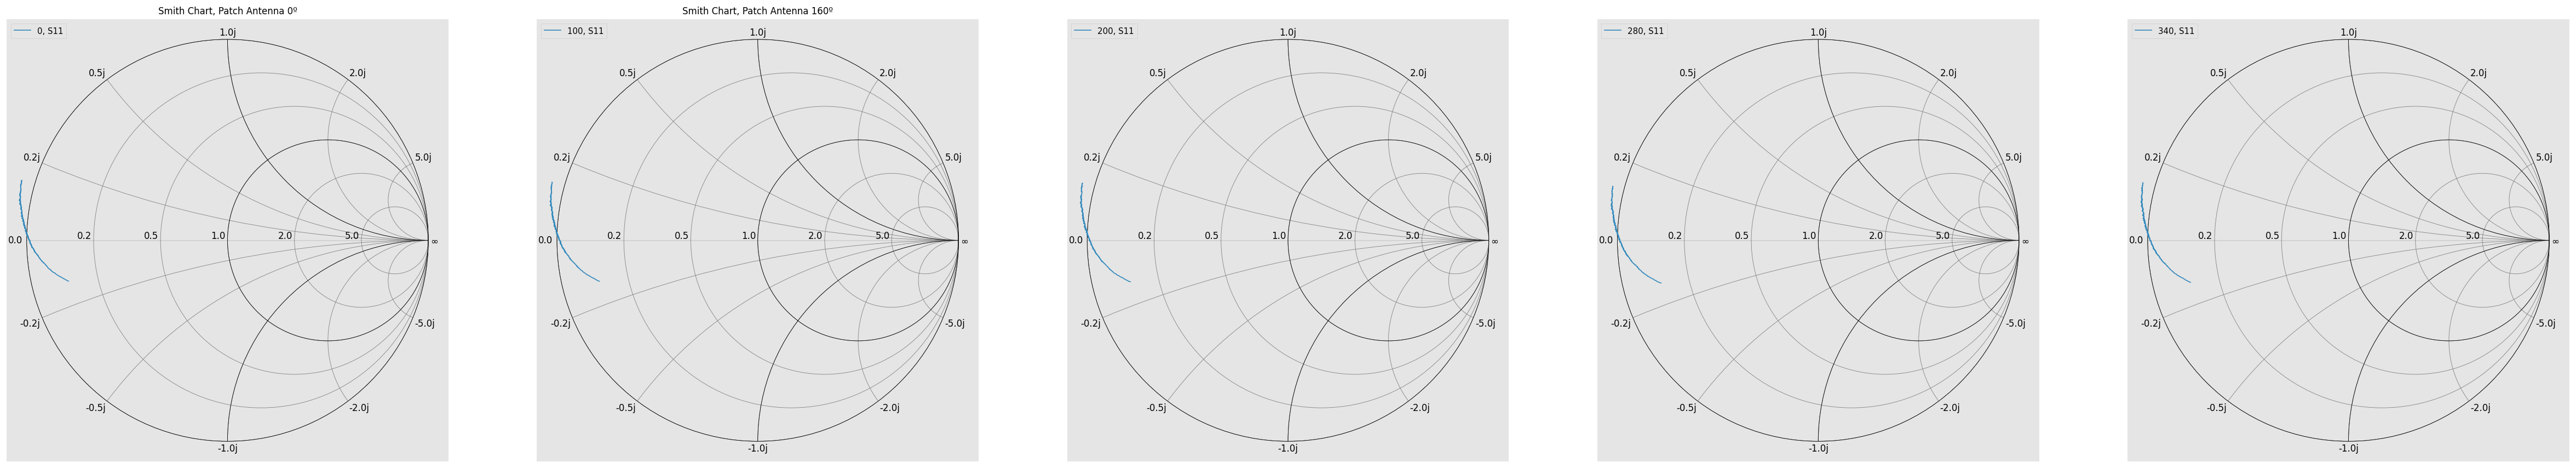

In [20]:
## plot s11
fig, axs = plt.subplots(1, 5, figsize=(50, 10))
rf.stylely()
networks_2[0].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks_2[5].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
networks_2[10].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[2])
networks_2[14].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[3])
networks_2[17].s11.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[4])
axs[0].set_title("Smith Chart, Patch Antenna 0º", fontsize=10)
axs[1].set_title("Smith Chart, Patch Antenna 160º", fontsize=10)

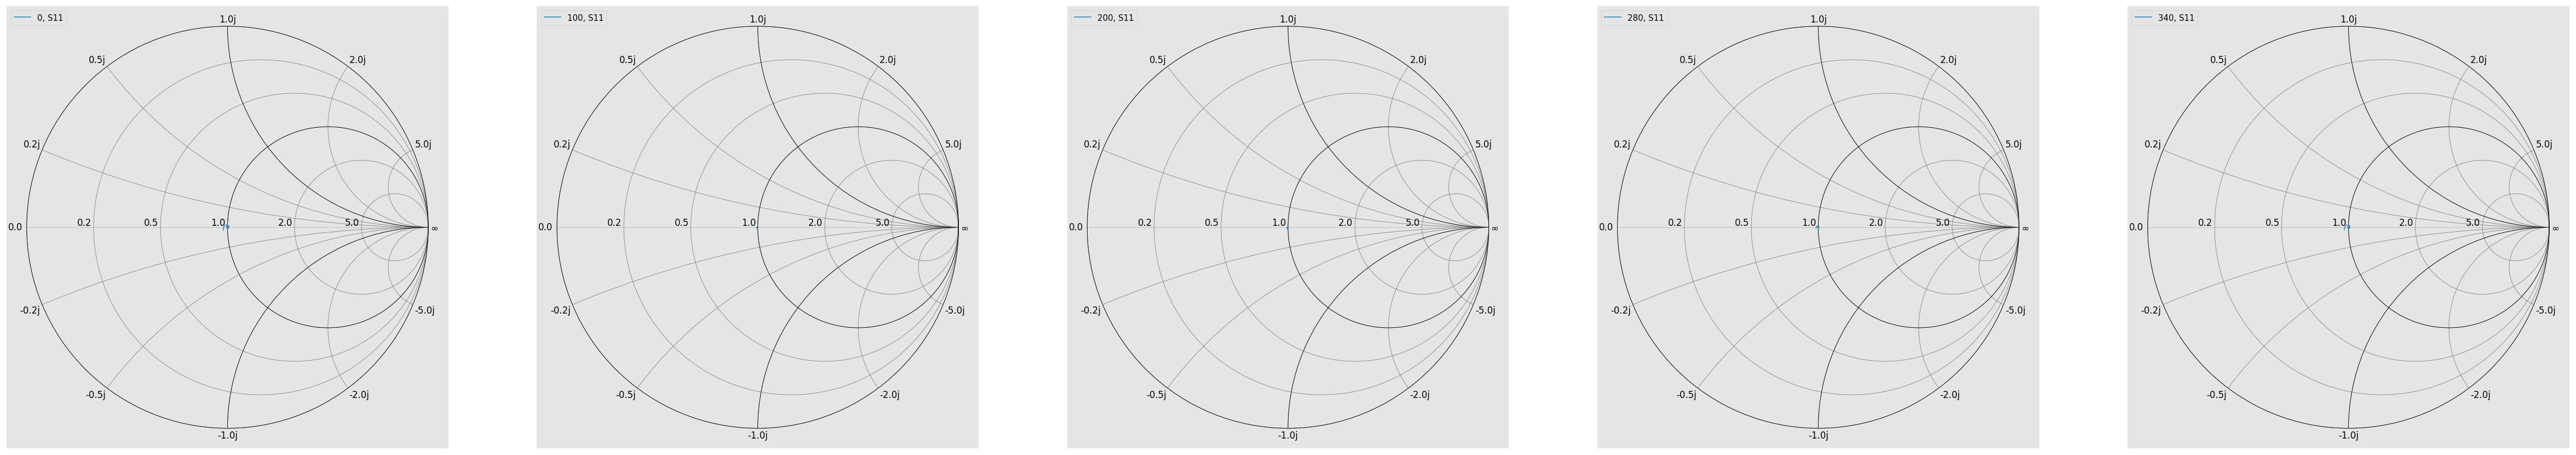

In [21]:
## plot s21
fig, axs = plt.subplots(1, 5, figsize=(50, 10))
rf.stylely()
networks_2[0].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks_2[5].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
networks_2[10].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[2])
networks_2[14].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[3])
networks_2[17].s21.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[4])

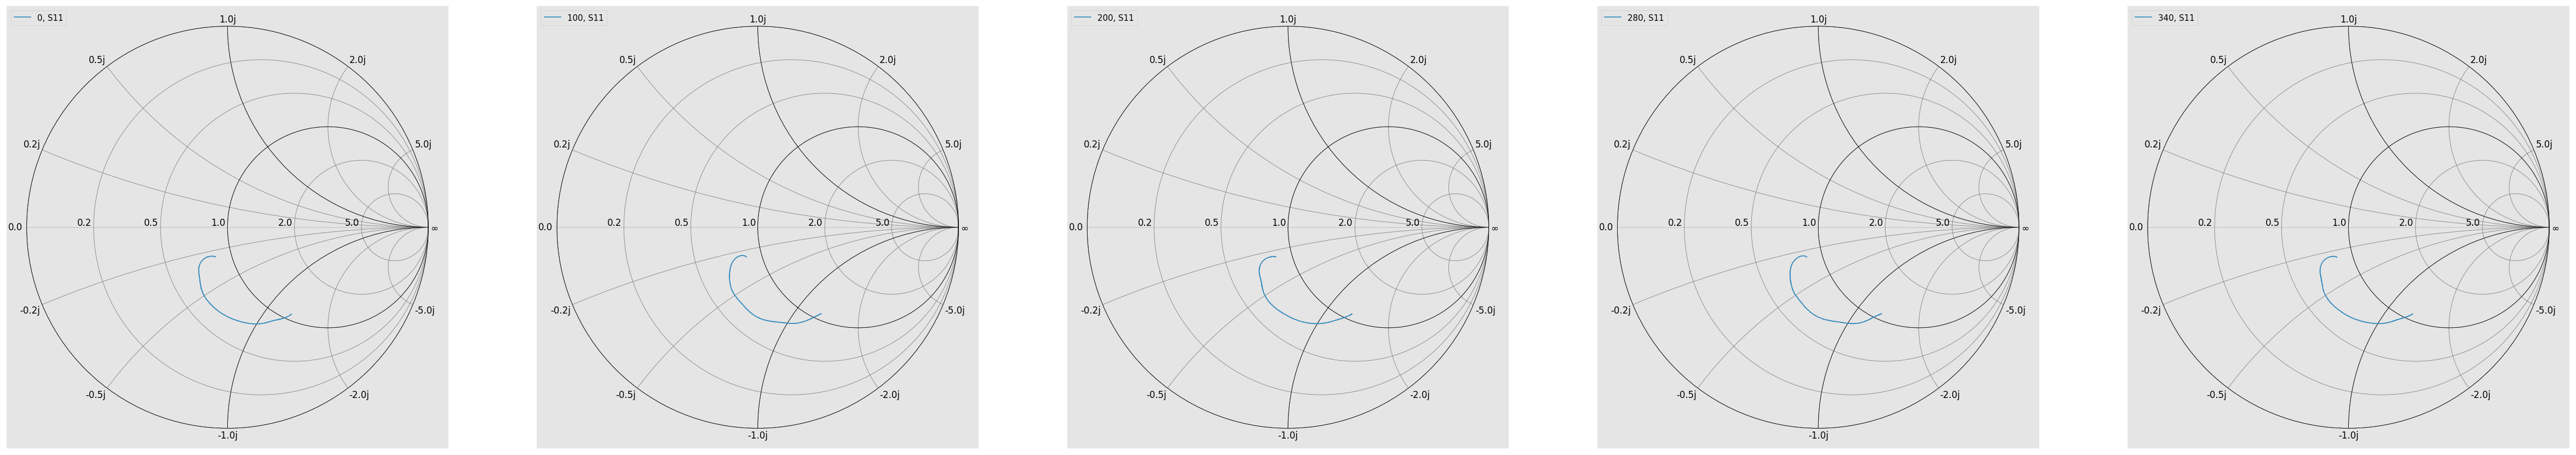

In [22]:
## plot s22
fig, axs = plt.subplots(1, 5, figsize=(50, 10))
rf.stylely()
networks_2[0].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[0])
networks_2[5].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[1])
networks_2[10].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[2])
networks_2[14].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[3])
networks_2[17].s22.plot_s_smith(draw_labels=True, linewidth=1, ax=axs[4])

Text(0.5, 1.0, 'All S Parameter Measurements for Unknown Antenna, 320º')

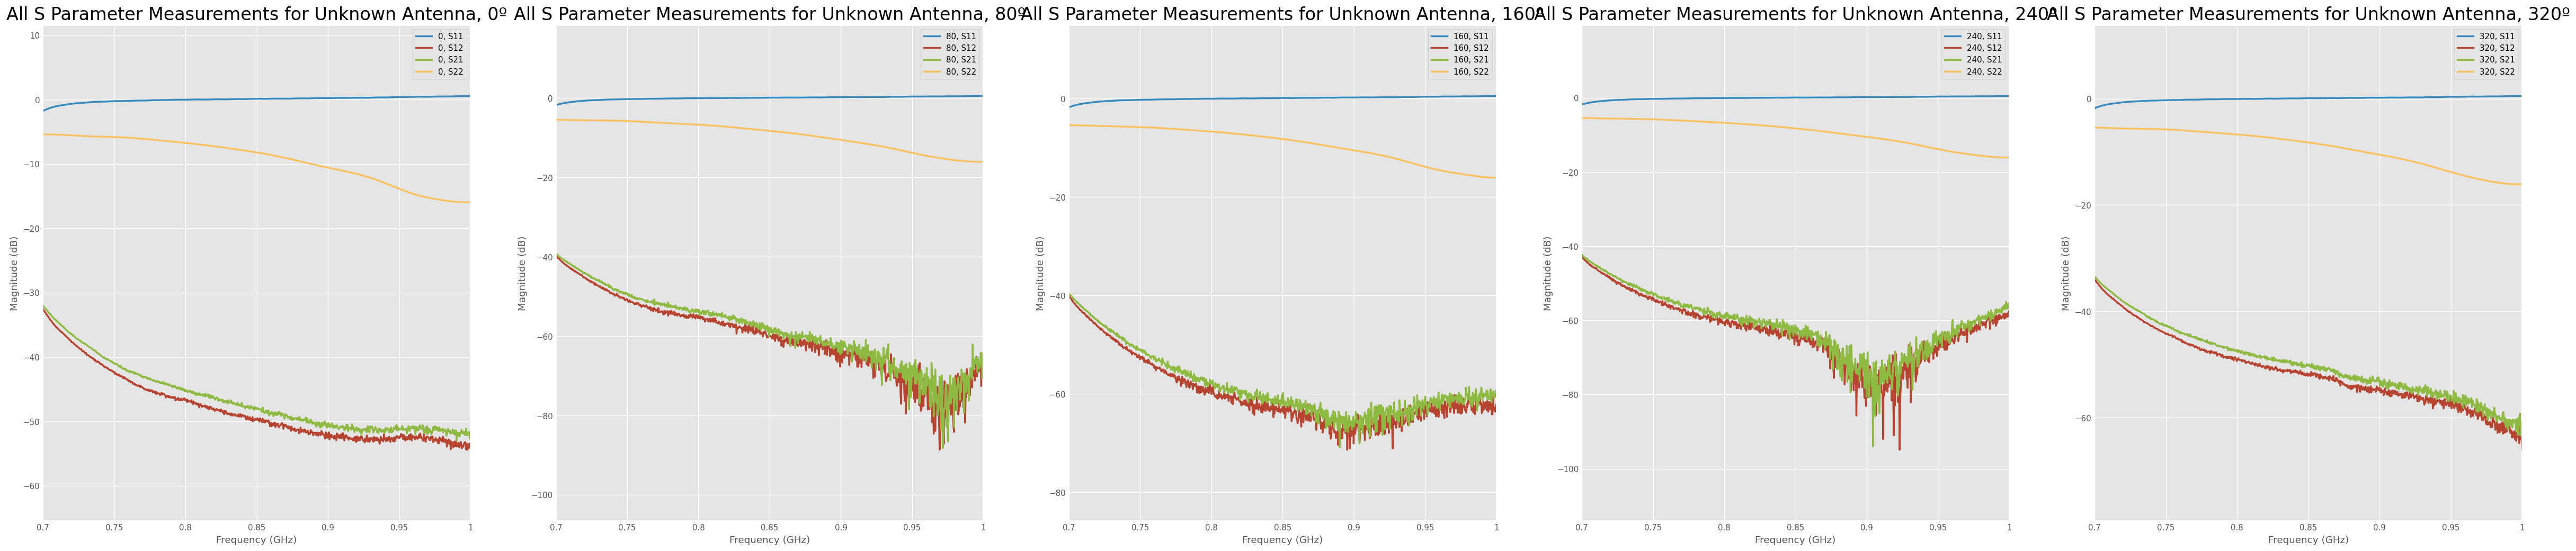

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(50, 10))
rf.stylely()
networks_2[0].plot_s_db(lw=2, ax=axs[0])
axs[0].set_title("All S Parameter Measurements for Unknown Antenna, 0º", fontsize=20)

networks_2[4].plot_s_db(lw=2, ax=axs[1])
axs[1].set_title("All S Parameter Measurements for Unknown Antenna, 80º", fontsize=20)

networks_2[8].plot_s_db(lw=2, ax=axs[2])
axs[2].set_title("All S Parameter Measurements for Unknown Antenna, 160º", fontsize=20)

networks_2[12].plot_s_db(lw=2, ax=axs[3])
axs[3].set_title("All S Parameter Measurements for Unknown Antenna, 240º", fontsize=20)

networks_2[16].plot_s_db(lw=2, ax=axs[4])
axs[4].set_title("All S Parameter Measurements for Unknown Antenna, 320º", fontsize=20)

#### Actual Resonant Frequency

#### Plotting all Frequencies

0.8242584027777866


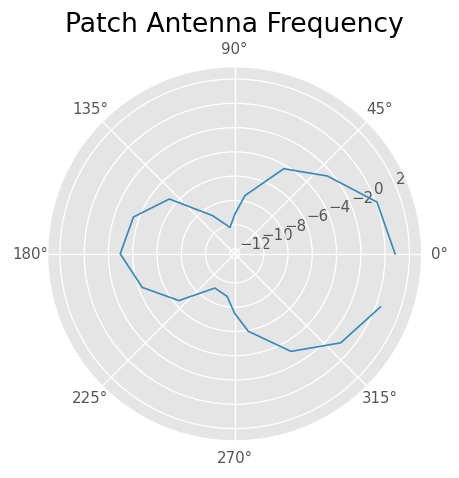

In [120]:
filenames_q2_3 = []
networks_q2_3 = []

s21_data_q2_3 = []

points=[0,20,40,60,80,90,100,120,140,160,180,200,220,240,260,270,280,300,320,340]
for i in points:
    # we're looking at txt files first
    filenames_q2_3 = 'Lab_5/Q2-680MHz/' + f"{i}.S1P"
    networks_q2_3.append(rf.Network(filenames_q2_3))

for net in networks_q2_3:
    s21_v = net['680.5Mhz'].s_db[0][0][0]
    s21_data_q2_3.append(s21_v)
    
g_tx = 4.03 # dBi -- Isotropic Gain with 680 MHz
l_val = 3e8/(680e6) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

g_rx_list_q2_3 = []

for s21 in s21_data_q2_3:
    val = s21 - g_tx - air_loss
    g_rx_list_q2_3.append(val)

# plot
ax = plt.subplot(111, polar=True)

# set zero west
# let set an azimuth for example, pi
angles_q2_3 = [p * 2 * np.pi / 360 for p in points]
plt.plot(angles_q2_3, g_rx_list_q2_3)
plt.title("Patch Antenna Frequency")

print(max(g_rx_list_q2_3))

Text(0.5, 1.0, 'All S Parameter Measurements for Patch Antenna, 0º')

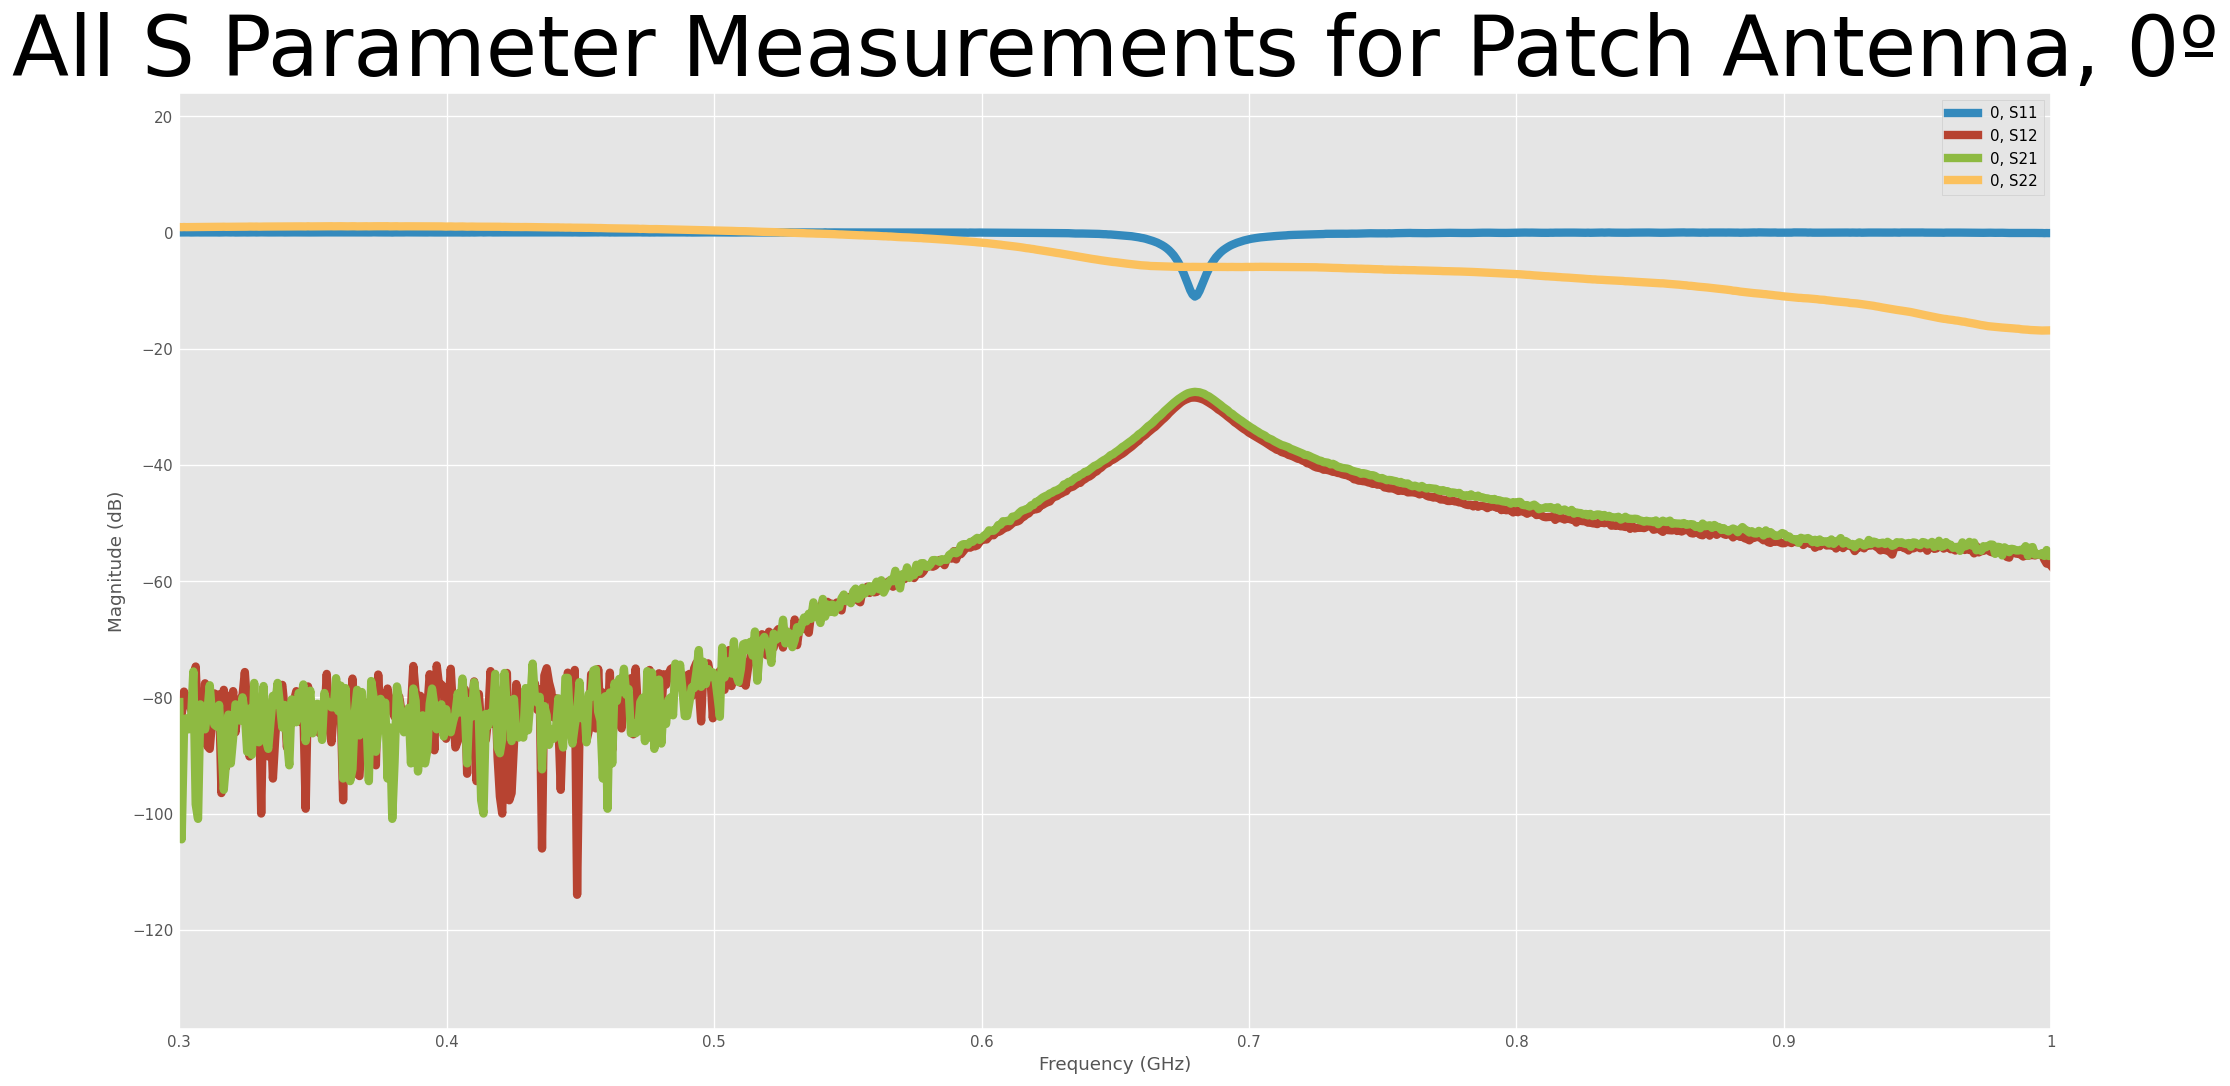

In [144]:
filename_q2_3 = 'Lab_5/Q2-680MHz/0.S2P'
network_q2_3 = rf.Network(filename_q2_3)

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
rf.stylely()
network_q2_3.plot_s_db(lw=5, axis=axs)
axs.set_title("All S Parameter Measurements for Patch Antenna, 0º", fontsize=50)

0.8236438713486223


Text(0.5, 0, 'Angle (CCW) [rad/sec]')

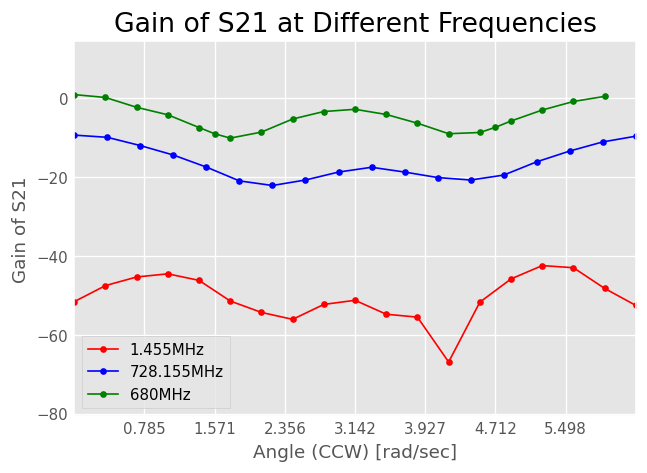

In [109]:
plt.xticks([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
plt.plot(angles_patch, g_rx_list_q2_1, 'ro-', label="1.455MHz")
plt.plot(angles_2, g_rx_list_q2_2, 'bo-', label="728.155MHz")
plt.plot(angles_q2_3, g_rx_list_q2_3, 'go-', label="680MHz")
print(g_rx_list_q2_3[0])
plt.legend()
plt.title("Gain of S21 at Different Frequencies")
plt.ylabel("Gain of S21")
plt.xlabel("Angle (CCW) [rad/sec]")

### Yagi Antenna

Text(0.5, 1.0, 'Yagi Antenna Frequency')

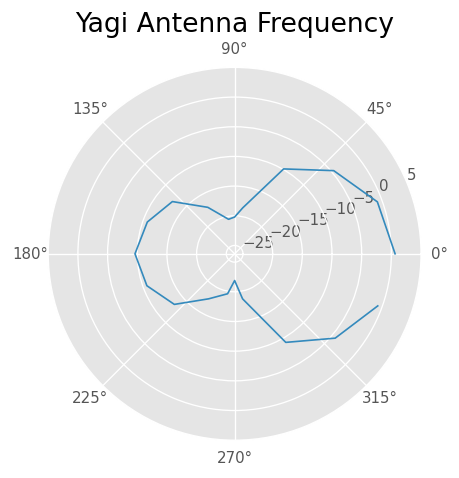

In [26]:
filenames_yagi = []
networks_yagi = []

s21_data_yagi = []

g_tx = 7.44 # dBi -- Isotropic Gain with 680 MHz
l_val = 3e8/(680e6) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

points=[0,20,40,60,80,90,100,120,140,160,180,200,220,240,260,270,280,300,320,340]
for i in points:
    # we're looking at txt files first
    filenames_yagi = 'Lab_5/Q3/' + f"{i}.S2P"
    networks_yagi.append(rf.Network(filenames_yagi))

for net in networks_yagi:
    s21_v = net['915Mhz'].s21.s_db[0][0][0]
    s21_data_yagi.append(s21_v)

g_rx_list_yagi = []

for s21 in s21_data_yagi:
    val = s21 - g_tx - air_loss
    g_rx_list_yagi.append(val)

# plot
ax = plt.subplot(111, polar=True)

# set zero west
# let set an azimuth for example, pi
angles_yagi = [p * 2 * np.pi / 360 for p in points]
plt.plot(angles_yagi, g_rx_list_yagi)
plt.title("Yagi Antenna Frequency")

/Users/zoeworrall/Desktop/Mudd/2024_4/RF_Circuitry/rf_venv/lib/python3.12/site-packages/skrf/mathFunctions.py:268: RuntimeWarning: divide by zero encountered in log10
  out = 20 * np.log10(z)


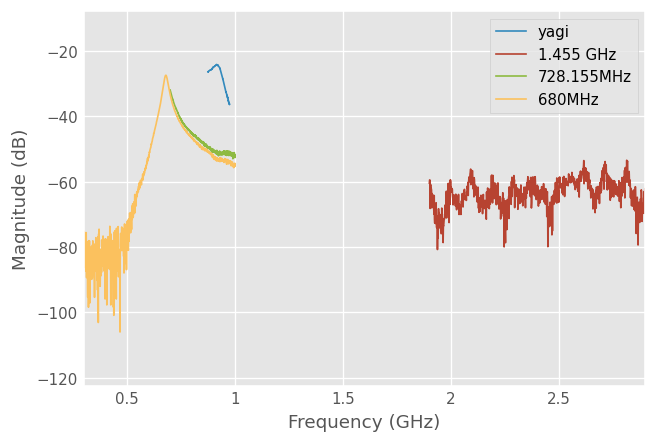

In [27]:
networks_yagi[0].s21.plot_s_db(label="yagi")
networks[0].s21.plot_s_db(label="1.455 GHz")
networks_2[0].s21.plot_s_db(label="728.155MHz")
networks_q2_3[0].plot_s_db(label="680MHz")

## Extracted impedance of patch antenna and comparison to theory

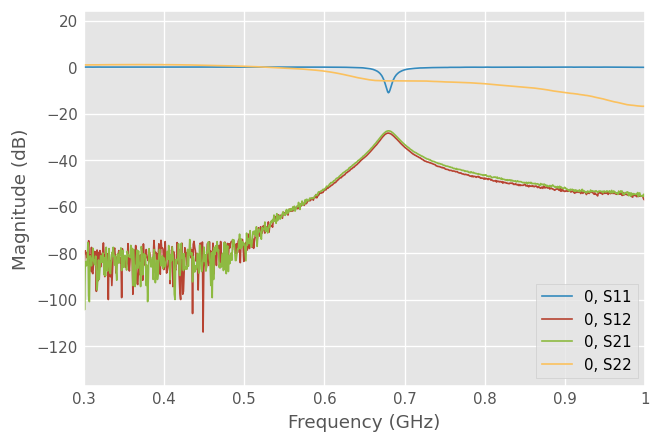

In [28]:
# we're looking at txt files first
filename_q2 = 'Lab_5/Q2-680MHz/0.S2P'
network_q2 = rf.Network(filename_q2)

network_q2.plot_s_db()

S11_pow = network_q2['680MHz'].s11.s_db

In [153]:
## calculate S11 at 0º - Gain
print(f"S11 in dB is {S11_pow}")
S11_volt = np.exp(S11_pow/20)

z0 = 50
Z_a = z0 * (S11_pow-1)/(S11_pow+1)

print(f"The impedance of the system is {Z_a}")

S11 in dB is [[[-11.04927354]]]
The impedance of the system is [[[59.95096806]]]


In [155]:
## calculating the impedance with measurements

e_r = 4
L = 0.103
W = 0.131

first_mult = e_r**2 / (e_r - 1)
secnd_mult = (L/W)**2

x_p = 0.025
Z_a_theory_0 = 90 * first_mult * secnd_mult

internal_mult = np.pi * x_p / L
third_mult = np.pow( np.cos( internal_mult ) , 2 )

Z_a_theory = Z_a_theory_0 * third_mult
print(Z_a_theory)

155.1546891529339


In [ ]:
Z_